In [698]:
## Importing libraries at one place for better segregration of the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
#warnings.filterwarnings('ignore')



### Data Understanding and Analysis

#### Sanity Checks

In [699]:
house_df=pd.read_csv('train.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [700]:
house_df.shape

(1460, 81)

In [701]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [702]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [703]:
print((house_df.describe().columns))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [704]:
def check_missing_values():
    temp=pd.DataFrame(round(100*(house_df.isnull().sum()/len(house_df.index)),2))
    temp=temp.reset_index()
    temp.columns=['column','missing%']
    temp.sort_values(by='missing%',ascending=False)
    print(temp[temp['missing%']>0][['column','missing%']].sort_values(by='missing%',ascending=False))
#temp.to_csv('dasf.csv')


In [705]:
check_missing_values()

          column  missing%
72        PoolQC     99.52
74   MiscFeature     96.30
6          Alley     93.77
73         Fence     80.75
57   FireplaceQu     47.26
3    LotFrontage     17.74
58    GarageType      5.55
59   GarageYrBlt      5.55
60  GarageFinish      5.55
63    GarageQual      5.55
64    GarageCond      5.55
32  BsmtExposure      2.60
35  BsmtFinType2      2.60
33  BsmtFinType1      2.53
31      BsmtCond      2.53
30      BsmtQual      2.53
26    MasVnrArea      0.55
25    MasVnrType      0.55
42    Electrical      0.07


#### Observations:

Even though the missing values in PoolQC,MiscFeatures column are more,those are valid NA values which hold a valid value as per the data dictionary .Hence,not deleting any features and converting the NA categories to a interpretable value (based on the data dictionary ) so that the model do not consider them as actual missing values.

##### Cleaning the missing values in categorical columns (replacing with a new category as they are valid values but being treated as missing)

In [706]:
dc_categorical={'PoolQC':'NP','MiscFeature':'NN','Alley':'NAA','Fence':'NF','FireplaceQu':'NF','GarageType':'NG',
                   'GarageFinish':'NG','GarageQual':'NG','GarageCond':'NG','BsmtFinType2':'NB','BsmtFinType1':'NB',
                   'BsmtCond':'NB','BsmtQual':'NB','BsmtExposure':'NB','MasVnrType':'None'}
#house_df.loc[house_df[col].isnull(),col]=dc_categorical[col]
for col in dc_categorical:
    house_df.loc[house_df[col].isnull(),col]=dc_categorical[col]
    
    

In [707]:
check_missing_values()

         column  missing%
3   LotFrontage     17.74
59  GarageYrBlt      5.55
26   MasVnrArea      0.55
42   Electrical      0.07


#### Handling the missing values in Numerical Columns

##### LotFrontage:
Since the LotConfig for most of the rows where LotFrontage is "NA" is either "Inside","Corner", or "Cul-de-Sac",replacing the LotFrontage=0 as this means that Lot is not beside a street.

Replacing the LotFrontage where the LotConfig is "FR2(Frontage on 2 sides of property)" with mean of that(FR2) Subcategory.

In [708]:
house_df.loc[((house_df['LotFrontage'].isnull()) & (house_df['LotConfig'].isin(['Corner','Inside','CulDSac']))),'LotFrontage']=0
#mode_LF=house_df.loc[house_df['LotConfig']=='FR2','LotFrontage']

house_df.loc[((house_df['LotFrontage'].isnull()) & (house_df['LotConfig']=='FR2')),'LotFrontage']=house_df.loc[house_df['LotConfig']=='FR2','LotFrontage'].mode()[0]


##### GarageYrBlt

Since these are the rows where Garage is not available for the house,updating the year as 0 as garage is never built.

In [709]:
house_df.loc[house_df['GarageYrBlt'].isnull(),'GarageYrBlt']=0

##### MasVnrArea

These are the rows where Masonry veneer type is None from which we can impute the missing values are 0 for the Masonry veneer area.

In [710]:
house_df.loc[house_df['MasVnrArea'].isnull(),'MasVnrArea']=0

##### Electrical

Replacing the missing values with the mode of the column.

In [711]:
house_df.loc[house_df['Electrical'].isnull(),'Electrical']=house_df['Electrical'].mode()[0]

In [712]:
check_missing_values()

Empty DataFrame
Columns: [column, missing%]
Index: []


###### Creating list of Numerical and Categorical columns

In [713]:
Num_cols=list(house_df.describe().columns)
Num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [714]:
cat_cols=list(house_df.select_dtypes(include='object').columns)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [715]:
#
cat_from_num=['MSSubClass']
#Removing the categorical columns from Num_cols list

for i in cat_from_num:
    Num_cols.remove(i)
    cat_cols.append(i)


In [716]:
Num_cols

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [717]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [718]:
len(cat_cols)

44

In [719]:
len(Num_cols)

37

In [720]:
def check_skewness(X):
    count_of_values = house_df[X].value_counts().values
    count_of_values = count_of_values/len(house_df)
    col_of_values = list(house_df[X].value_counts().index)
    dict_data = {}
    for i in range(0,len(col_of_values)):
        dict_data[col_of_values[i]] = count_of_values[i]
    df = pd.DataFrame(data=dict_data,index=[X])
    return df

In [721]:
def analyse_cat_cols(col,i):
    
    
    sns.set(font_scale=2.5)
    ax = plt.subplot(10,5,i+1)
    check_skewness(col).plot(kind='bar',stacked=True,ax = ax)
    plt.xticks(rotation=0)
    ax.set_ylim([0.0,1.0])
    #ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1.1), shadow=True, ncol=1)

In [722]:
msclass_dict={20: '1-STORY NEWER',30: '1-STORY OLDER',40: '1-STORY FINISHED ATTIC',45: '1-1/2 STORY - UNFINISHED',50: '1-1/2 STORY FINISHED',60: '2-STORY NEWER',70: '2-STORY OLDER',75: '2-HALF STORY ALL AGES',80: 'SPLIT OR MULTI-LEVEL',85: 'SPLIT FOYER',90: 'DUPLEX ALL STYLES',120: '1-STORY PUD NEWER',150: '1-1/2 STORY PUD ALL AGES',160: '2-STORY PUD NEWER',180: 'PUD - MULTILEVEL',190: '2 FAMILY CONVERSION'}

In [723]:
#msclass_dict
house_df['MSSubClass']=house_df.MSSubClass.apply(lambda x:msclass_dict[x])
house_df['MSSubClass']

0       2-STORY NEWER
1       1-STORY NEWER
2       2-STORY NEWER
3       2-STORY OLDER
4       2-STORY NEWER
            ...      
1455    2-STORY NEWER
1456    1-STORY NEWER
1457    2-STORY OLDER
1458    1-STORY NEWER
1459    1-STORY NEWER
Name: MSSubClass, Length: 1460, dtype: object

In [724]:
house_df.MSSubClass.value_counts().sort_values()

1-STORY FINISHED ATTIC        4
PUD - MULTILEVEL             10
1-1/2 STORY - UNFINISHED     12
2-HALF STORY ALL AGES        16
SPLIT FOYER                  20
2 FAMILY CONVERSION          30
DUPLEX ALL STYLES            52
SPLIT OR MULTI-LEVEL         58
2-STORY OLDER                60
2-STORY PUD NEWER            63
1-STORY OLDER                69
1-STORY PUD NEWER            87
1-1/2 STORY FINISHED        144
2-STORY NEWER               299
1-STORY NEWER               536
Name: MSSubClass, dtype: int64

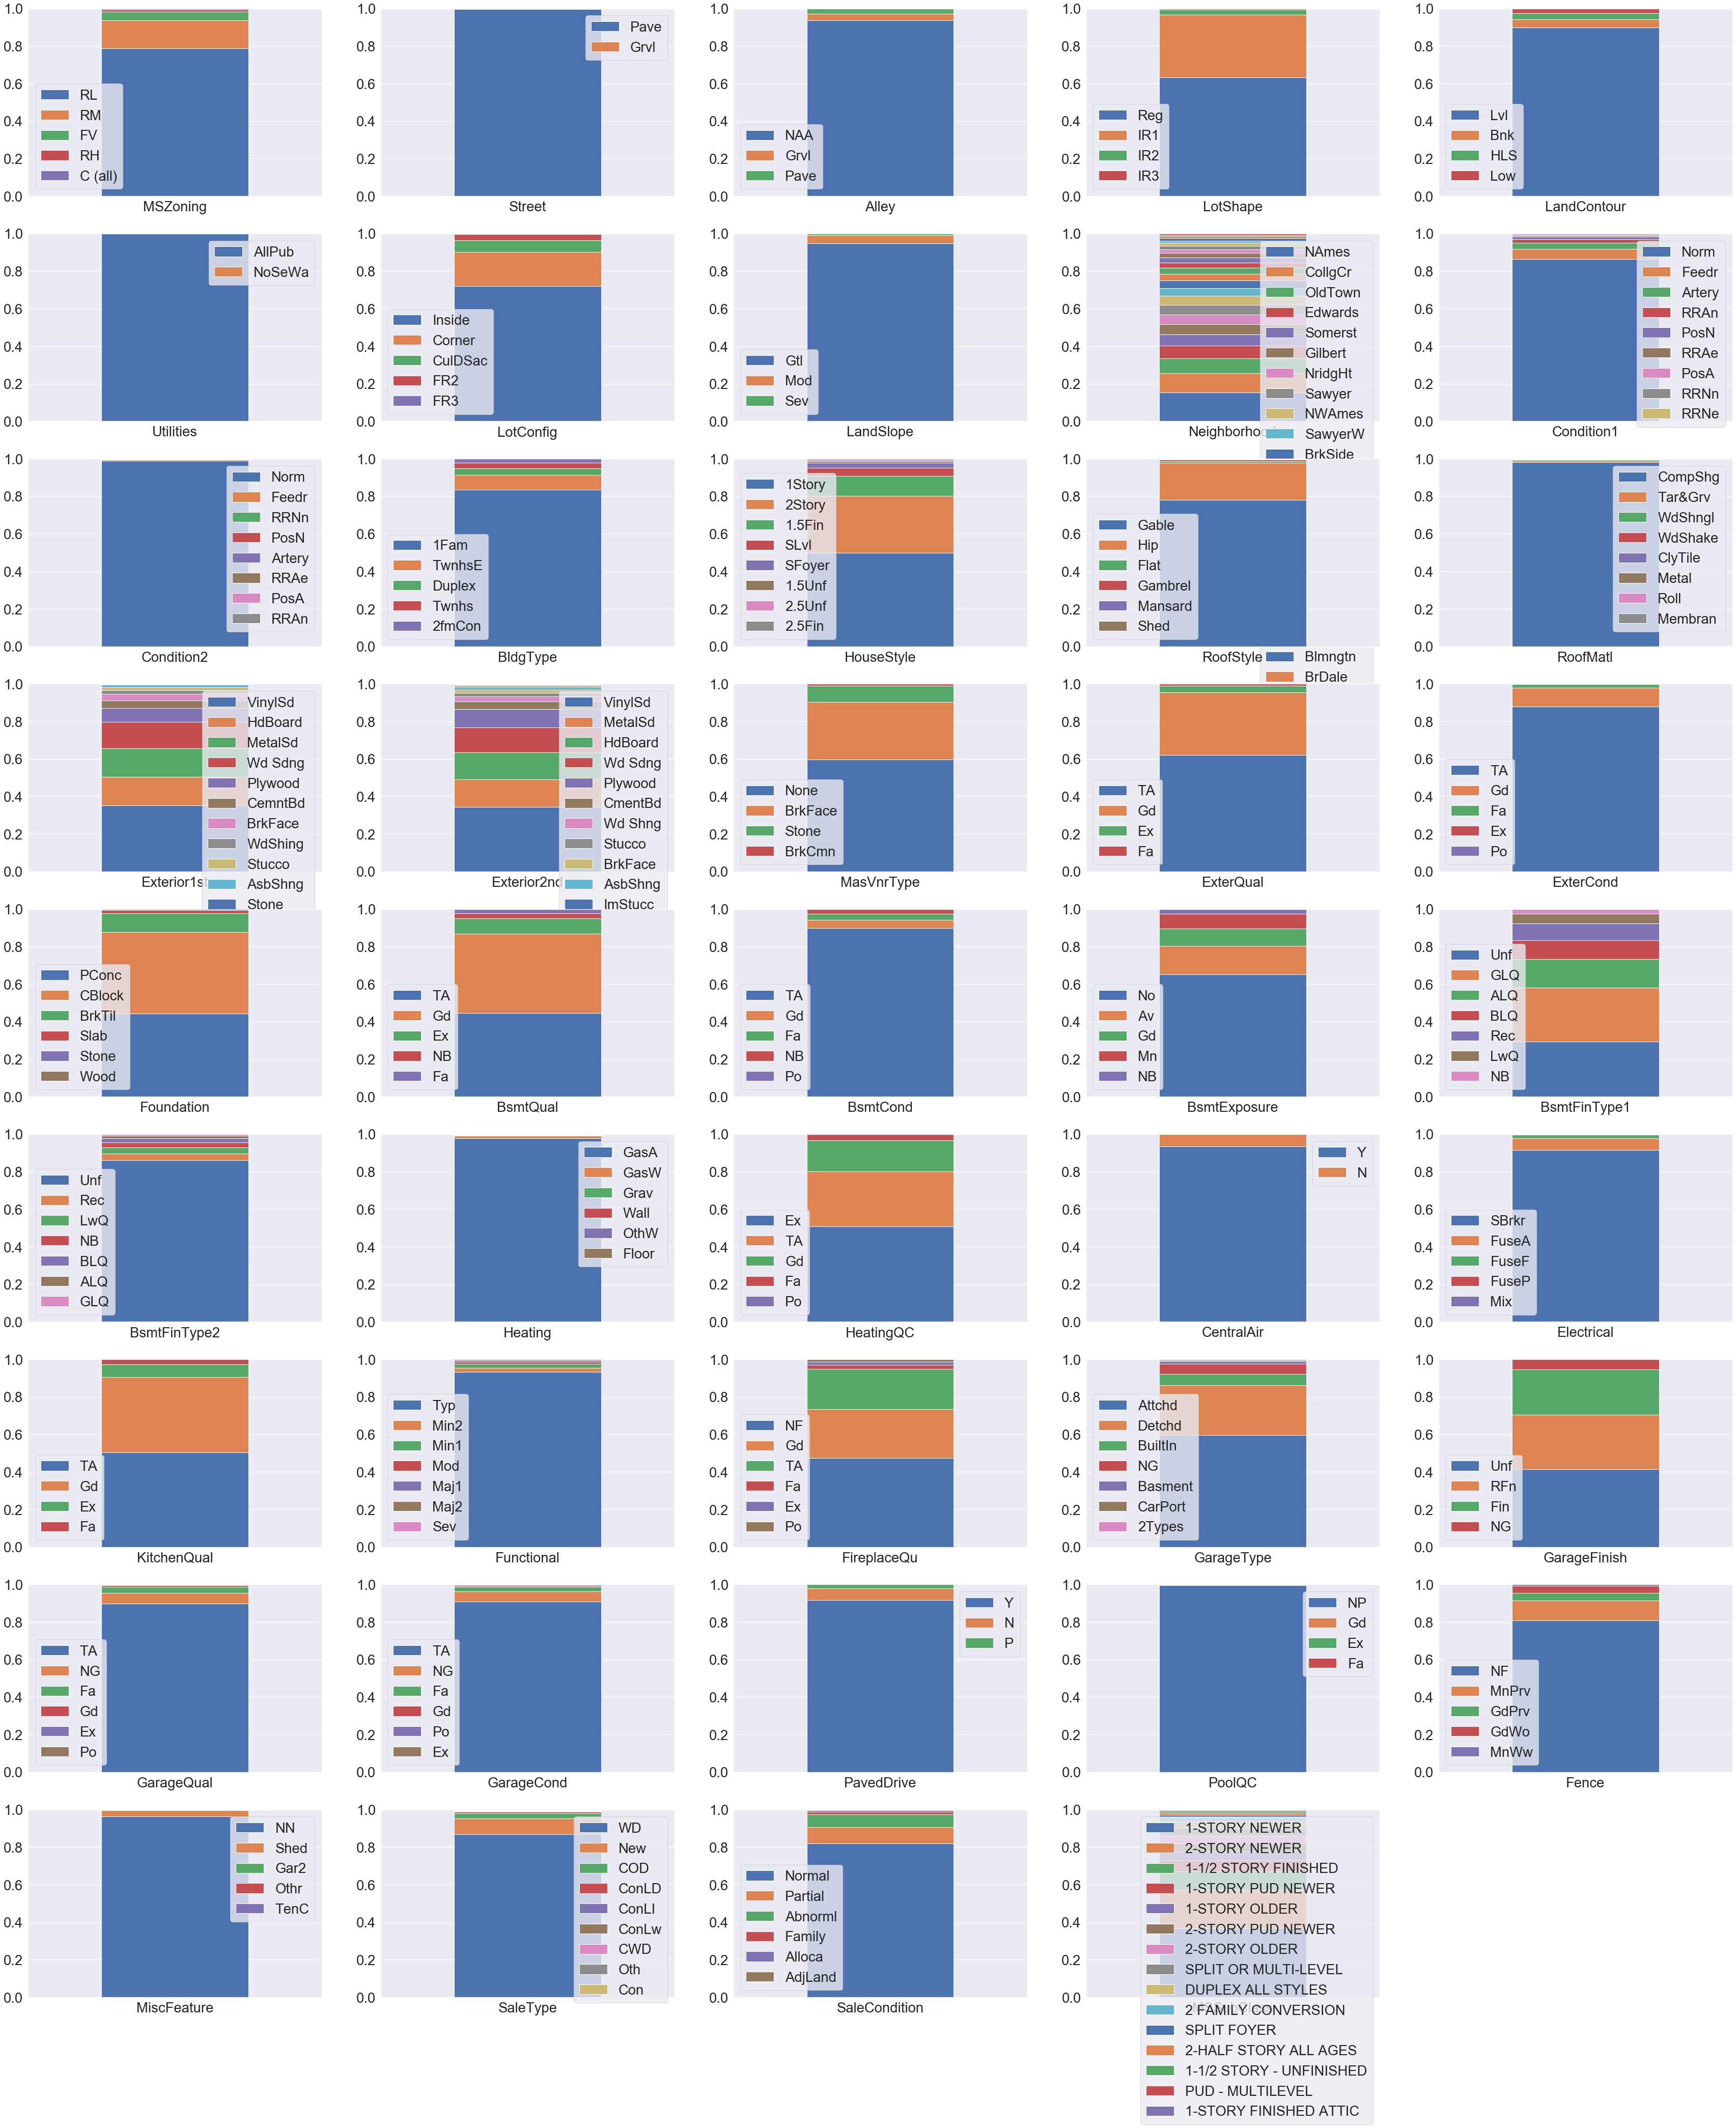

In [725]:
plt.figure(figsize=(60,80))
for i in range(len(cat_cols)):
    analyse_cat_cols(cat_cols[i],i)
#analyse_cat_cols('SaleType')

#### Observation:

1.A good number of columns like PoolQC,CentralAir,Heating are highly skewed(most of the datapoints have one value)<br>
2.For the variable MSSubClass,the code need to be mapped to respective values from the data dictionary.

##### Understanding the Target variable - "SalePrice"


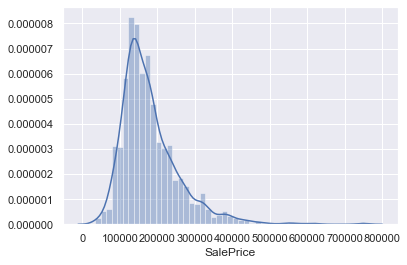

In [726]:
sns.set(font_scale=1)
sns.distplot(house_df['SalePrice'])

##### Observation:
As the distribution is rightly skewed,applying the logarithmic transformation.

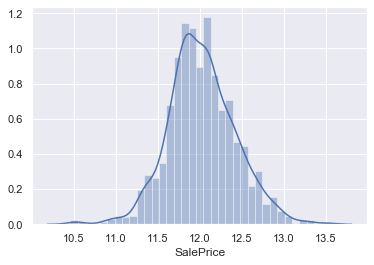

In [727]:
house_df['SalePrice']=np.log(house_df['SalePrice'])
sns.distplot(house_df['SalePrice'])

#### Numerical Columns Analysis

##### Converting year columns - GarageYrBlt,YrSold,YearBuilt,YearRemodAdd to respective Age columns to convert to Ordinal columns

In [728]:
year_cols=['GarageYrBlt','YrSold','YearBuilt','YearRemodAdd']
for yr in year_cols:
    house_df[yr]=house_df[yr].max()-house_df[yr]

##### Identifying highly correlated columns

In [729]:

house_df[Num_cols].corr().unstack().reset_index()

,level_0,level_1,0
0,Id,Id,1.000000
1,Id,LotFrontage,-0.017120
2,Id,LotArea,-0.033226
3,Id,OverallQual,-0.028365
4,Id,OverallCond,0.012609
...,...,...,...
1364,SalePrice,PoolArea,0.069798
1365,SalePrice,MiscVal,-0.020021
1366,SalePrice,MoSold,0.057329
1367,SalePrice,YrSold,0.037263


In [730]:
house_corrdf = house_df[Num_cols].corr().where(np.triu(np.ones(house_df[Num_cols].corr().shape),k=1).astype(np.bool))
house_corrdf

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,NaN,-0.01712,-0.033226,-0.028365,0.012609,0.012713,0.021998,-0.051071,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.000712,-0.017942
LotFrontage,NaN,NaN,0.105380,0.179490,-0.055486,-0.045100,-0.085684,0.106845,0.081178,-0.011700,...,-0.015315,0.075632,0.020673,0.029558,0.017967,0.114252,-0.059422,0.009592,0.011640,0.183011
LotArea,NaN,NaN,NaN,0.105806,-0.005636,-0.014228,-0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.257320
OverallQual,NaN,NaN,NaN,NaN,-0.091932,-0.572323,-0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.027347,0.817184
OverallCond,NaN,NaN,NaN,NaN,NaN,0.375983,-0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.043950,-0.036868
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,0.592855,-0.311600,-0.249503,0.049107,...,-0.224880,-0.188686,0.387268,-0.031355,0.050364,-0.004950,0.034383,-0.012398,-0.013618,-0.586570
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.176529,-0.128451,0.067759,...,-0.205726,-0.226298,0.193919,-0.045286,0.038740,-0.005829,0.010286,-0.021490,0.035743,-0.565608
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.008317,0.426775
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,-0.014359,0.372023
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.031706,0.004832


In [731]:
house_corrdf=house_corrdf.unstack().reset_index()
house_corrdf

,level_0,level_1,0
0,Id,Id,NaN
1,Id,LotFrontage,NaN
2,Id,LotArea,NaN
3,Id,OverallQual,NaN
4,Id,OverallCond,NaN
...,...,...,...
1364,SalePrice,PoolArea,0.069798
1365,SalePrice,MiscVal,-0.020021
1366,SalePrice,MoSold,0.057329
1367,SalePrice,YrSold,0.037263


In [732]:
house_corrdf.columns=['var1','var2','correlation']
house_corrdf

,var1,var2,correlation
0,Id,Id,NaN
1,Id,LotFrontage,NaN
2,Id,LotArea,NaN
3,Id,OverallQual,NaN
4,Id,OverallCond,NaN
...,...,...,...
1364,SalePrice,PoolArea,0.069798
1365,SalePrice,MiscVal,-0.020021
1366,SalePrice,MoSold,0.057329
1367,SalePrice,YrSold,0.037263


In [733]:
house_corrdf.dropna(subset=['correlation'],inplace=True)
house_corrdf

,var1,var2,correlation
37,LotFrontage,Id,-0.017120
74,LotArea,Id,-0.033226
75,LotArea,LotFrontage,0.105380
111,OverallQual,Id,-0.028365
112,OverallQual,LotFrontage,0.179490
...,...,...,...
1363,SalePrice,ScreenPorch,0.121208
1364,SalePrice,PoolArea,0.069798
1365,SalePrice,MiscVal,-0.020021
1366,SalePrice,MoSold,0.057329


In [734]:
house_corrdf.sort_values(by='correlation',ascending=False).head(10)

,var1,var2,correlation
987,GarageArea,GarageCars,0.882475
829,TotRmsAbvGrd,GrLivArea,0.825489
455,1stFlrSF,TotalBsmtSF,0.819530
1335,SalePrice,OverallQual,0.817184
1347,SalePrice,GrLivArea,0.700927
568,GrLivArea,2ndFlrSF,0.687501
1357,SalePrice,GarageCars,0.680625
834,TotRmsAbvGrd,BedroomAbvGr,0.676620
1358,SalePrice,GarageArea,0.650888
600,BsmtFullBath,BsmtFinSF1,0.649212


In [735]:
house_corrdf.sort_values(by='correlation').head(10)

,var1,var2,correlation
949,GarageCars,GarageYrBlt,-0.598005
1337,SalePrice,YearBuilt,-0.586570
188,YearBuilt,OverallQual,-0.572323
1338,SalePrice,YearRemodAdd,-0.565608
986,GarageArea,GarageYrBlt,-0.560783
225,YearRemodAdd,OverallQual,-0.550684
930,GarageCars,YearBuilt,-0.537850
378,BsmtUnfSF,BsmtFinSF1,-0.495251
967,GarageArea,YearBuilt,-0.478954
671,FullBath,YearBuilt,-0.468271


In [736]:
house_corrdf.to_csv('house_correlation.csv')

#### Dropping highly correlated columns from the above matrix

In [737]:
corr_columns=['GarageCars','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','OverallQual','YearRemodAdd']
house_df.drop(corr_columns,axis=1,inplace=True)
for col in corr_columns:
    Num_cols.remove(col)

#### Plotting numerical variables against SalePrice

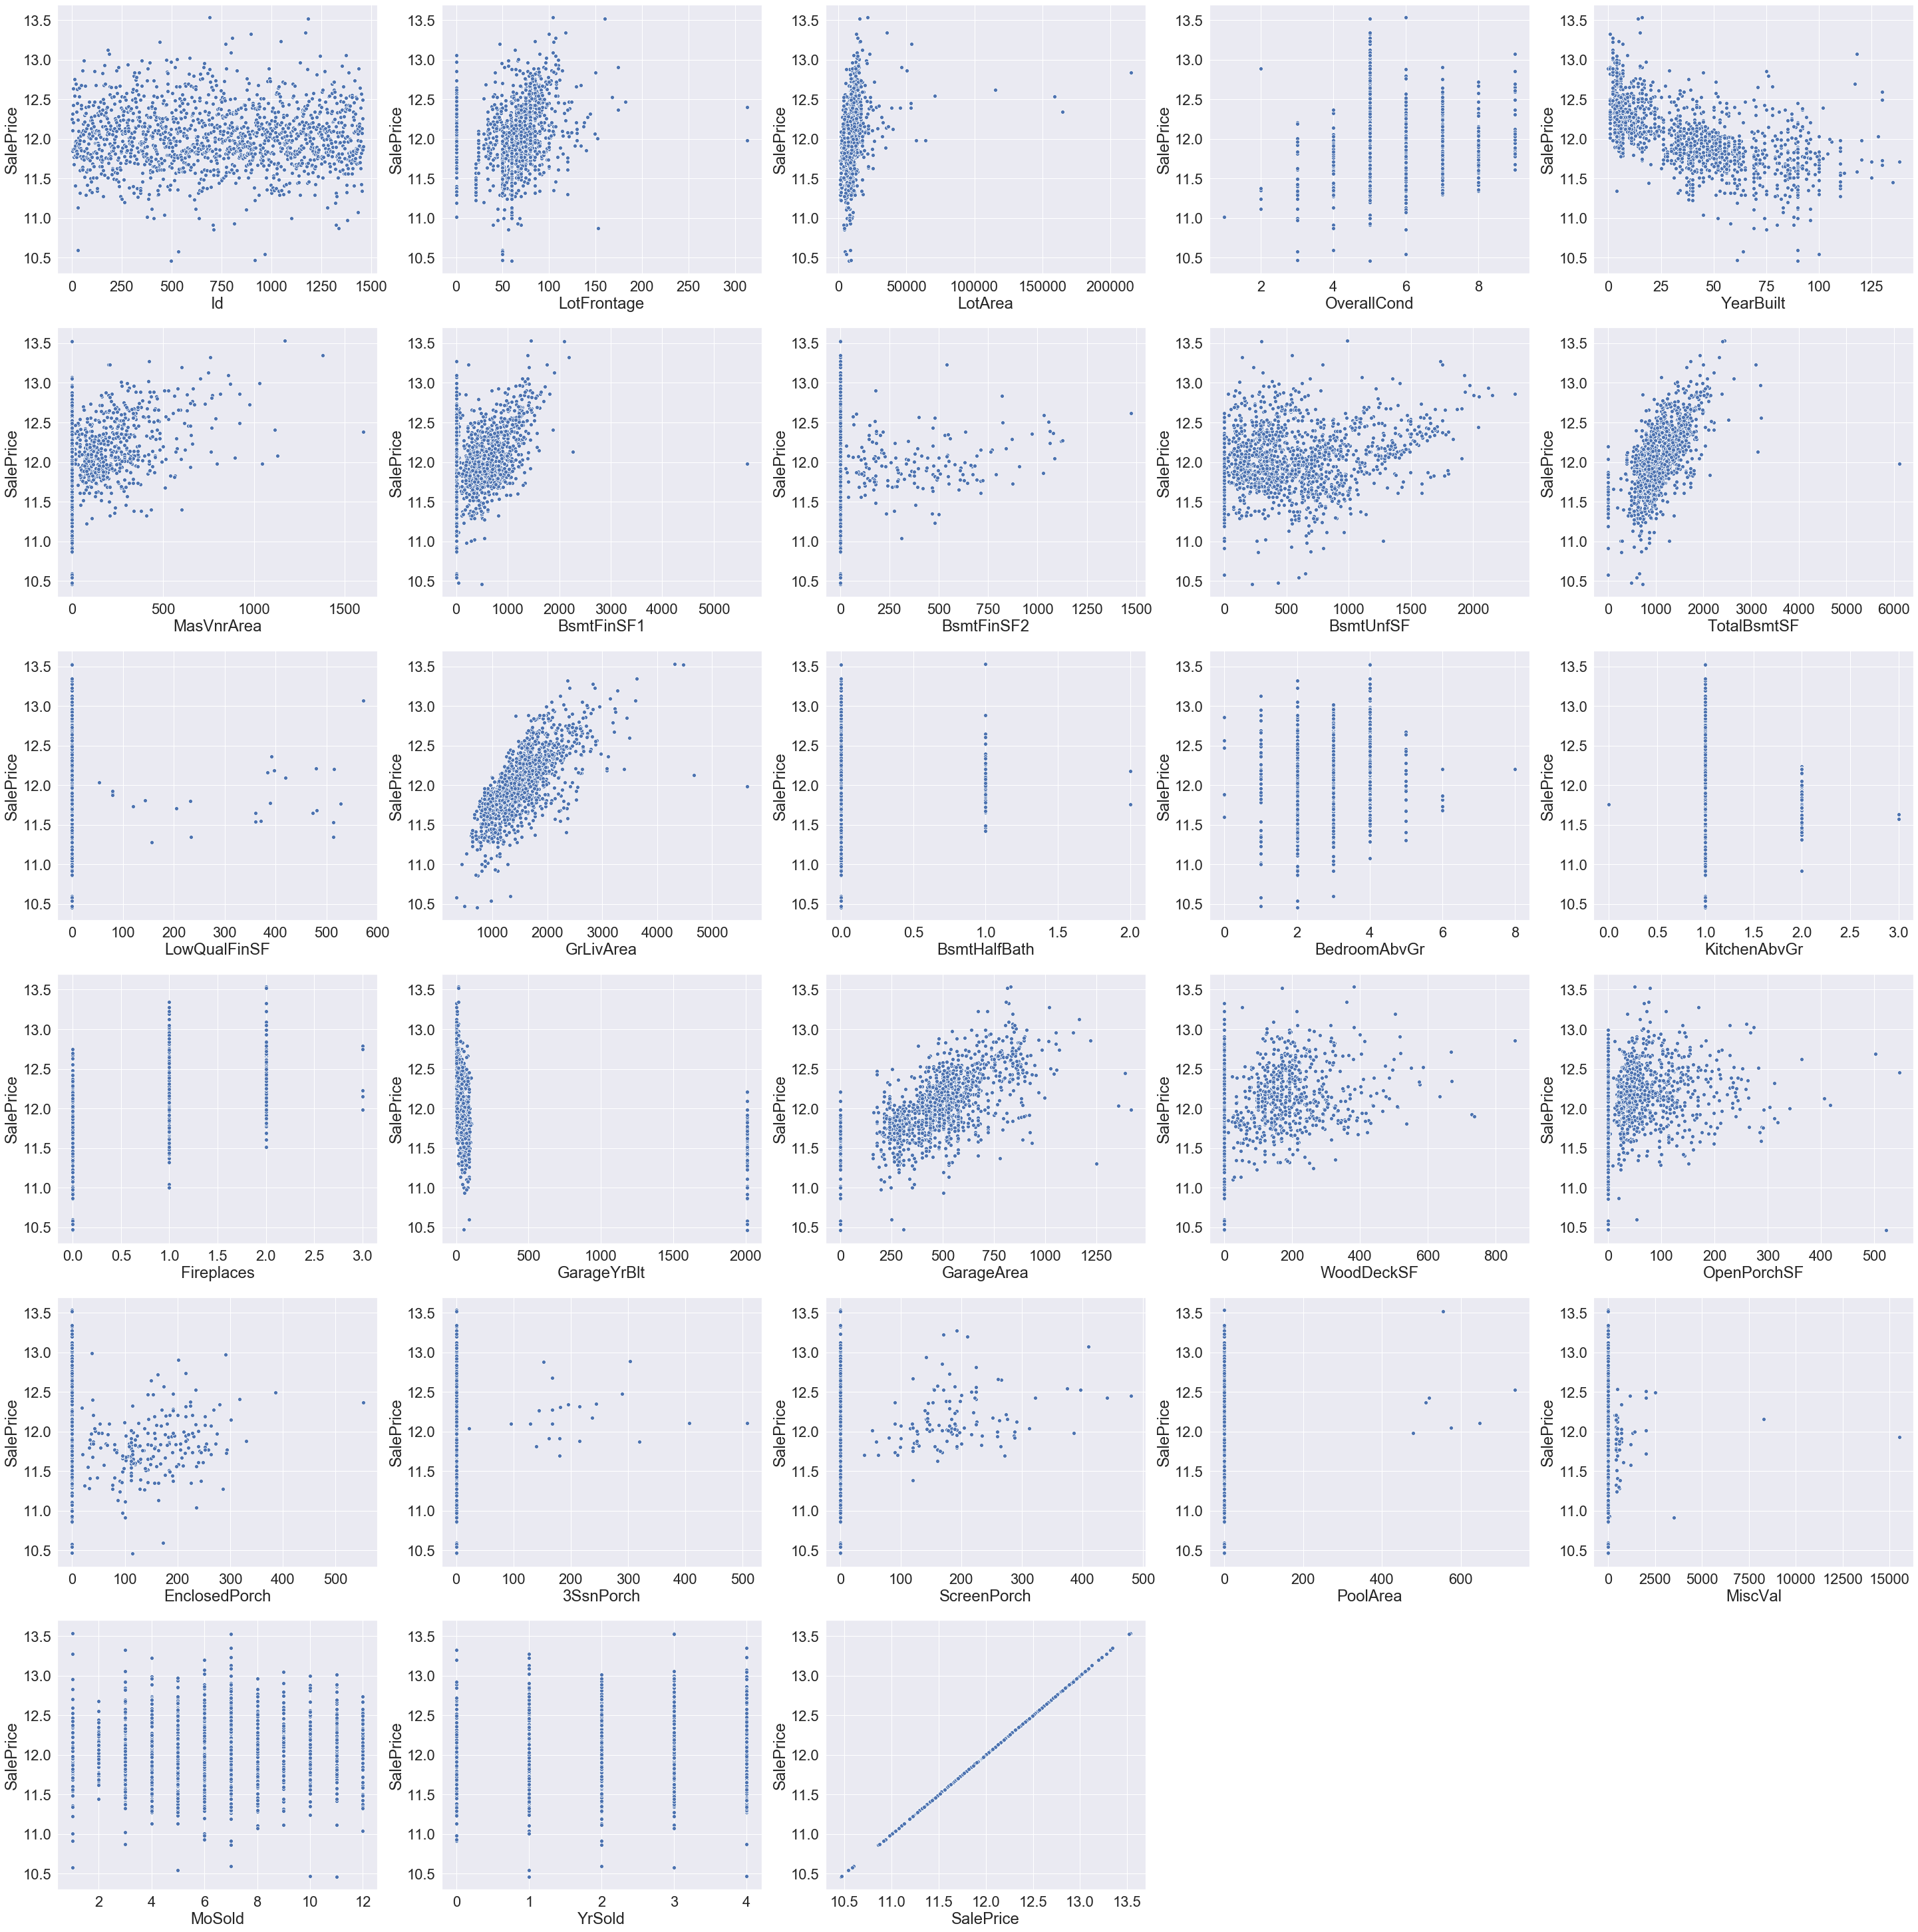

In [738]:
plt.figure(figsize=(50,70))
sns.set(font_scale=2)
for i in range(0,len(Num_cols)):
    ax=plt.subplot(8,5,i+1)
    sns.scatterplot(x=Num_cols[i],y='SalePrice',data=house_df,ax=ax)
    #house_df.plot(kind='scatter',x=Num_cols[i],y='SalePrice')

In [739]:
### Creating heatmap on numerical columns to understand the correlation
df_num_cols=house_df[Num_cols]
plt.figure(figsize=(50,50))
sns.set(font_scale=2.5)
#sns.heatmap(df_num_cols.corr(),annot=True,annot_kws={"size":20})

<Figure size 3600x3600 with 0 Axes>

#### Creating Dummies for Categorical columns

In [740]:
### dc_categorical holds the columns whose NA was a valid NA and they were replaced with appropriate categories based on the data dictionary.
## Hence,they can be considered as a candidate for removal during dummies creation
## Also,there are other columns from the above bar graph - CentralAir,PavedDrive,SaleType
## Instead of using dropFirst feature of getDummies,creating a dictionary and removing appropriate columns

dc_categorical['CentralAir']='N'
dc_categorical['PavedDrive']='N'
dc_categorical['SaleType']='Oth'
dc_categorical['MSSubClass']='1-STORY FINISHED ATTIC'
dc_categorical

{'PoolQC': 'NP',
 'MiscFeature': 'NN',
 'Alley': 'NAA',
 'Fence': 'NF',
 'FireplaceQu': 'NF',
 'GarageType': 'NG',
 'GarageFinish': 'NG',
 'GarageQual': 'NG',
 'GarageCond': 'NG',
 'BsmtFinType2': 'NB',
 'BsmtFinType1': 'NB',
 'BsmtCond': 'NB',
 'BsmtQual': 'NB',
 'BsmtExposure': 'NB',
 'MasVnrType': 'None',
 'CentralAir': 'N',
 'PavedDrive': 'N',
 'SaleType': 'Oth',
 'MSSubClass': '1-STORY FINISHED ATTIC'}

In [741]:
for col in dc_categorical:
    dumm=pd.get_dummies(house_df[col],prefix=col)
    house_df=pd.concat([house_df,dumm],axis=1)
    drop_col=col+'_'+dc_categorical[col]
    house_df.drop(drop_col,inplace=True,axis=1)
    house_df.drop(col,inplace=True,axis=1)

house_df.info(verbose=True)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 142 columns):
Id                                     int64
MSZoning                               object
LotFrontage                            float64
LotArea                                int64
Street                                 object
LotShape                               object
LandContour                            object
Utilities                              object
LotConfig                              object
LandSlope                              object
Neighborhood                           object
Condition1                             object
Condition2                             object
BldgType                               object
HouseStyle                             object
OverallCond                            int64
YearBuilt                              int64
RoofStyle                              object
RoofMatl                               object
Exterior1st          

In [742]:
for col in cat_cols:
    if col not in list(dc_categorical):
        dumm=pd.get_dummies(house_df[col],drop_first=True,prefix=col)
        house_df=pd.concat([house_df,dumm],axis=1)
        house_df.drop(col,axis=1,inplace=True)

house_df.info(verbose=True)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 265 columns):
Id                                     int64
LotFrontage                            float64
LotArea                                int64
OverallCond                            int64
YearBuilt                              int64
MasVnrArea                             float64
BsmtFinSF1                             int64
BsmtFinSF2                             int64
BsmtUnfSF                              int64
TotalBsmtSF                            int64
LowQualFinSF                           int64
GrLivArea                              int64
BsmtHalfBath                           int64
BedroomAbvGr                           int64
KitchenAbvGr                           int64
Fireplaces                             int64
GarageYrBlt                            float64
GarageArea                             int64
WoodDeckSF                             int64
OpenPorchSF                    

### Data Pre-Processing

#### Train and Test data split

In [743]:
y=house_df.pop('SalePrice')
X=house_df

In [744]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [745]:
X_train.shape

(1021, 264)

In [746]:
X_test.shape

(438, 264)

In [747]:
y_train

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
          ...    
1009    11.532728
802     12.149502
53      12.860999
350     12.669998
79      11.608236
Name: SalePrice, Length: 1021, dtype: float64

#### Scaling the Numerical variables

In [748]:
Num_cols

['Id',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [749]:
scaler=StandardScaler()
Num_cols.remove('Id')
Num_cols.remove('SalePrice')
X_train[Num_cols]=scaler.fit_transform(X_train[Num_cols])
X_train[Num_cols].head()

C:\Users\varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\varun\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
210,0.254047,-0.473765,0.383154,1.524903,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.124502,...,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-0.134653
318,0.933908,-0.056845,-0.533005,-0.717033,0.809137,1.160345,-0.293313,-0.454644,0.621579,-0.124502,...,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-0.881833
239,-0.189341,-0.169324,-1.449164,0.865510,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.124502,...,-1.183084,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-1.629012
986,0.017573,-0.502297,2.215472,2.019448,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.124502,...,-1.018473,2.423490,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.104424,1.359706
1416,0.047133,0.082905,0.383154,2.843689,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,-0.124502,...,0.416000,-0.743160,-0.709347,1.435160,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-1.629012


### Model Building

In [750]:
X_train.head()

,Id,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,211,0.254047,-0.473765,0.383154,1.524903,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,...,0,0,0,0,1,0,0,0,1,0
318,319,0.933908,-0.056845,-0.533005,-0.717033,0.809137,1.160345,-0.293313,-0.454644,0.621579,...,0,0,0,0,1,0,0,0,1,0
239,240,-0.189341,-0.169324,-1.449164,0.865510,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,...,0,0,0,0,1,0,0,0,1,0
986,987,0.017573,-0.502297,2.215472,2.019448,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,...,0,0,0,0,1,0,0,0,1,0
1416,1417,0.047133,0.082905,0.383154,2.843689,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,...,0,0,0,0,1,0,0,0,1,0


In [751]:
lm1=LinearRegression()
lm1.fit(X_train,y_train)
rfe=RFE(lm1,30)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=30, step=1, verbose=0)

In [752]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Id', False, 231),
 ('LotFrontage', False, 223),
 ('LotArea', False, 131),
 ('OverallCond', False, 110),
 ('YearBuilt', False, 93),
 ('MasVnrArea', False, 211),
 ('BsmtFinSF1', False, 48),
 ('BsmtFinSF2', False, 53),
 ('BsmtUnfSF', False, 54),
 ('TotalBsmtSF', False, 47),
 ('LowQualFinSF', False, 173),
 ('GrLivArea', False, 9),
 ('BsmtHalfBath', False, 219),
 ('BedroomAbvGr', False, 203),
 ('KitchenAbvGr', False, 154),
 ('Fireplaces', False, 199),
 ('GarageYrBlt', True, 1),
 ('GarageArea', False, 124),
 ('WoodDeckSF', False, 178),
 ('OpenPorchSF', False, 190),
 ('EnclosedPorch', False, 183),
 ('3SsnPorch', False, 195),
 ('ScreenPorch', False, 179),
 ('PoolArea', False, 226),
 ('MiscVal', False, 217),
 ('MoSold', False, 213),
 ('YrSold', False, 214),
 ('PoolQC_Ex', False, 108),
 ('PoolQC_Fa', False, 74),
 ('PoolQC_Gd', True, 1),
 ('MiscFeature_Gar2', False, 43),
 ('MiscFeature_Othr', False, 117),
 ('MiscFeature_Shed', False, 215),
 ('MiscFeature_TenC', False, 232),
 ('Alley_Grvl', Fal

In [753]:
X_train[X_train.columns[rfe.support_]]

,GarageYrBlt,PoolQC_Gd,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,...,GarageCond_TA,BsmtQual_Ex,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition2_PosN,RoofMatl_Membran,Exterior1st_BrkComm,Exterior1st_CBlock
210,4.069183,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
318,-0.276109,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
239,-0.180177,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
986,-0.182357,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1416,-0.228143,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,4.069183,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
802,-0.302273,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
53,-0.249946,0,0,1,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
350,-0.306633,0,0,1,0,0,0,0,0,1,...,1,1,0,0,1,0,0,0,0,0
